🎯 Desafio dia 100 — Mini Projeto: Recomendação de Cursos com Dados de Perfil e Avaliação

📂 Datasets:

    📥 alunos.csv

    📥 historico.csv

🔍 Contexto: Uma plataforma de cursos quer usar dados de perfis de alunos e seu histórico de cursos para entender padrões de comportamento e recomendar cursos personalizados.

Você tem dois arquivos:

    alunos.csv: perfil de cada aluno com idade, nível educacional, disponibilidade semanal e interesse em tecnologia.

    historico.csv: cursos que os alunos já assistiram, com a avaliação dada de 6 a 10.

🛠️ Tarefas do Mini Projeto
🧹 1. Tratamento e Preparação de Dados

    Faça merge dos dois datasets via id_aluno.

    Use OneHotEncoder ou get_dummies para as colunas categóricas:

        nivel_educacional, interesse_tecnologia, curso

📊 2. Análise Geral

    Qual curso tem a melhor avaliação média geral?

    Alunos com mais horas disponíveis por semana tendem a avaliar melhor os cursos?
    → calcule a correlação entre horas_disponiveis_semana e avaliacao.

📈 3. Visualização

    Crie um gráfico de barras com a avaliação média por curso.

    Faça um boxplot da avaliação por interesse_tecnologia.

🤖 4. Modelo Previsor de Avaliação

    Treine um modelo para prever a avaliacao que um aluno daria a um curso com base em:

        idade, horas_disponiveis_semana, nivel_educacional, interesse_tecnologia, curso

    Use:

        train_test_split, RandomForestRegressor, mean_squared_error

🧠 5. Recomendação

    Para um novo aluno com o seguinte perfil:

    idade = 24
    nivel_educacional = 'Superior'
    horas_disponiveis_semana = 12
    interesse_tecnologia = 'Alto'

    → gere a previsão de nota esperada para cada curso e recomende os 3 cursos mais promissores.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [12]:
alunos_df = pd.read_csv("desafio_dia_100_alunos.csv")
hist_df = pd.read_csv("desafio_dia_100_historico.csv")

display(alunos_df.head())
display(hist_df.head())

,id_aluno,idade,nivel_educacional,horas_disponiveis_semana,interesse_tecnologia
0,1001,25,Pós,4.4,Alto
1,1002,41,Técnico,5.6,Baixo
2,1003,20,Técnico,9.0,Baixo
3,1004,24,Pós,4.3,Médio
4,1005,40,Técnico,13.8,Médio


,id_aluno,curso,avaliacao
0,1037,Redes,8.4
1,1067,Power BI,6.4
2,1079,Power BI,8.9
3,1072,Excel,7.2
4,1002,Marketing Digital,8.8


In [14]:
#Faça merge dos dois datasets via id_aluno.
df = pd.merge(hist_df, alunos_df, on='id_aluno')
df.head()

,id_aluno,curso,avaliacao,idade,nivel_educacional,horas_disponiveis_semana,interesse_tecnologia
0,1037,Redes,8.4,44,Superior,14.4,Médio
1,1067,Power BI,6.4,41,Técnico,12.9,Baixo
2,1079,Power BI,8.9,25,Pós,12.4,Médio
3,1072,Excel,7.2,25,Superior,18.3,Baixo
4,1002,Marketing Digital,8.8,41,Técnico,5.6,Baixo


In [15]:
#Use OneHotEncoder ou get_dummies para as colunas categóricas:
    #nivel_educacional, interesse_tecnologia, curso
df_encoded = pd.get_dummies(df, columns=["nivel_educacional", "interesse_tecnologia", "curso"], drop_first=True)

df_encoded.head()

,id_aluno,avaliacao,idade,horas_disponiveis_semana,nivel_educacional_Pós,nivel_educacional_Superior,nivel_educacional_Técnico,interesse_tecnologia_Baixo,interesse_tecnologia_Médio,curso_Excel,curso_Finanças,curso_Java,curso_Marketing Digital,curso_Power BI,curso_Python,curso_Redes
0,1037,8.4,44,14.4,False,True,False,False,True,False,False,False,False,False,False,True
1,1067,6.4,41,12.9,False,False,True,True,False,False,False,False,False,True,False,False
2,1079,8.9,25,12.4,True,False,False,False,True,False,False,False,False,True,False,False
3,1072,7.2,25,18.3,False,True,False,True,False,True,False,False,False,False,False,False
4,1002,8.8,41,5.6,False,False,True,True,False,False,False,False,True,False,False,False


In [20]:
#Qual curso tem a melhor avaliação média geral?
curso_avaliacao_geral = df.groupby("curso")["avaliacao"].mean().sort_values(ascending=False)
print(curso_avaliacao_geral)

curso
Power BI             8.124324
Data Science         8.056098
Excel                8.042424
Python               8.000000
Redes                7.982927
Marketing Digital    7.923529
Finanças             7.889474
Java                 7.763158
Name: avaliacao, dtype: float64


In [30]:
#Alunos com mais horas disponíveis por semana tendem a avaliar melhor os cursos?
#→ calcule a correlação entre horas_disponiveis_semana e avaliacao.

corr_horas_disponiveis_avaliacao = df["horas_disponiveis_semana"].corr(df["avaliacao"])
print(corr_horas_disponiveis_avaliacao)

0.048067103548519265


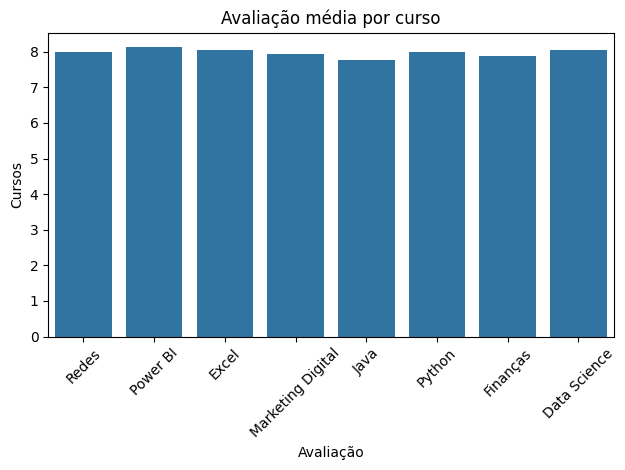

In [27]:
#Crie um gráfico de barras com a avaliação média por curso.
sns.barplot(df, x="curso", y="avaliacao", errorbar=None)
plt.title("Avaliação média por curso")
plt.xlabel("Avaliação")
plt.ylabel("Cursos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

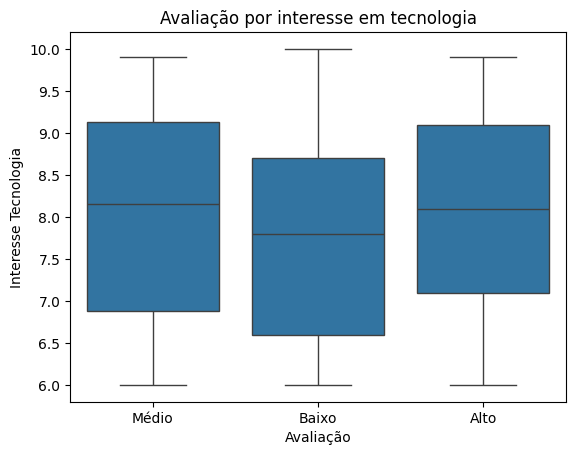

In [31]:
#Faça um boxplot da avaliação por interesse_tecnologia.
sns.boxplot(df, x="interesse_tecnologia", y="avaliacao")
plt.title("Avaliação por interesse em tecnologia")
plt.xlabel("Avaliação")
plt.ylabel("Interesse Tecnologia")
plt.show()

In [32]:
#Treine um modelo para prever a avaliacao que um aluno daria a um curso com base em:
    #idade, horas_disponiveis_semana, nivel_educacional, interesse_tecnologia, curso

X = df_encoded.drop(columns=["id_aluno", "avaliacao"])
y = df_encoded["avaliacao"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

modelo = RandomForestRegressor(random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(mean_squared_error(y_test, y_pred))

1.7592779951358273


In [49]:
#Recomendação
#Para um novo aluno com o seguinte perfil:

#idade = 24
#nivel_educacional = 'Superior'
#horas_disponiveis_semana = 12
#interesse_tecnologia = 'Alto'

#→ gere a previsão de nota esperada para cada curso e recomende os 3 cursos mais promissores.

dados_novo_aluno = {
    "idade": 24,
    "nivel_educacional": "Superior",
    "horas_disponiveis_semana": 12,
    "interesse_tecnologia": "Alto"
}

aluno_df = pd.DataFrame([dados_novo_aluno])

todos_cursos = df["curso"].unique()
recomendacoes = []

for curso in todos_cursos:
    entrada = aluno_df.copy()
    entrada["curso"] = curso

    entrada_dummie = pd.get_dummies(entrada)

    entrada_dummie = entrada_dummie.reindex(columns=X.columns, fill_value=0)

    nota = modelo.predict(entrada_dummie)[0]
    recomendacoes.append((curso, nota))

top3 = sorted(recomendacoes, key=lambda x: x[1], reverse=True)[:3]

for curso, nota in top3:
    print(f"{curso}: {nota:.2f}")

Python: 7.94
Data Science: 7.93
Finanças: 7.89
